In [ ]:
import pandas as pd

### App Reviews Sentiments Analysis

In [4]:
df=pd.read_csv("C:\\Users\\HARSHITA\\Downloads\\linkedin-reviews - linkedin-reviews.csv")

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# EDA

### PLOTTING THE DISTRIBUTION OF RATINGS

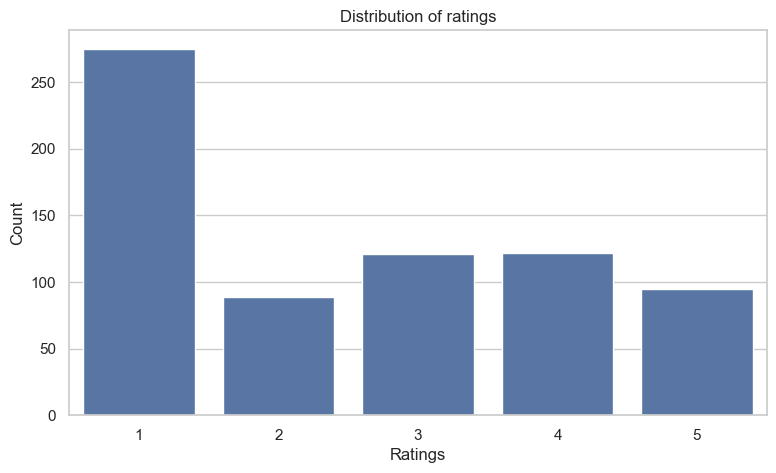

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Rating')
plt.title('Distribution of ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

## ADDING SENTIMENTS LABELS IN THE DATA

we will use textblob . Textblob provides a polarity scores raning from -1(vary negative) to  vary positive for a given text . we can use this code to classify each reviews sentiments as positive ,negative or neutral.

In [ ]:
!pip install textblob

In [9]:
from textblob import TextBlob

In [10]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity<-0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [14]:
df['Sentiment']=df['Review'].apply(textblob_sentiment_analysis)

In [15]:
df.sample(5)

,Review,Rating,Sentimnets,Sentiment
304,"Nice app, but too slow",3,Positive,Positive
624,Why does this app all of a sudden need to know...,2,Negative,Negative
133,Could really benefit from having groups and co...,3,Positive,Positive
13,though you do have to pay,1,Neutral,Neutral
145,Please could you add groups and then this app ...,3,Negative,Negative


## ANALYZING APP REVIEWS SENTIMENTS

In [16]:
sentiment_distribution=df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Neutral     300
Positive    295
Negative    107
Name: count, dtype: int64

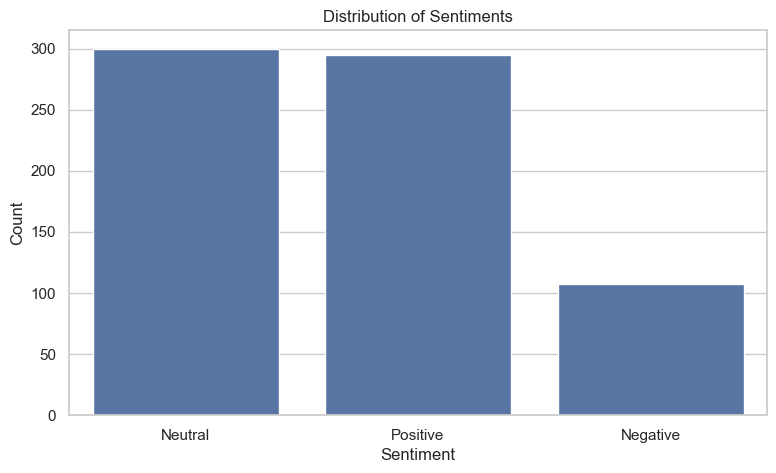

In [17]:
plt.figure(figsize=(9,5))
sns.barplot(x= sentiment_distribution.index,y=sentiment_distribution.values)
plt.title("Distribution of Sentiments")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So we can see althrough the app has low ratings,still the reviewers dont't use many negative  words in the reviews for app.

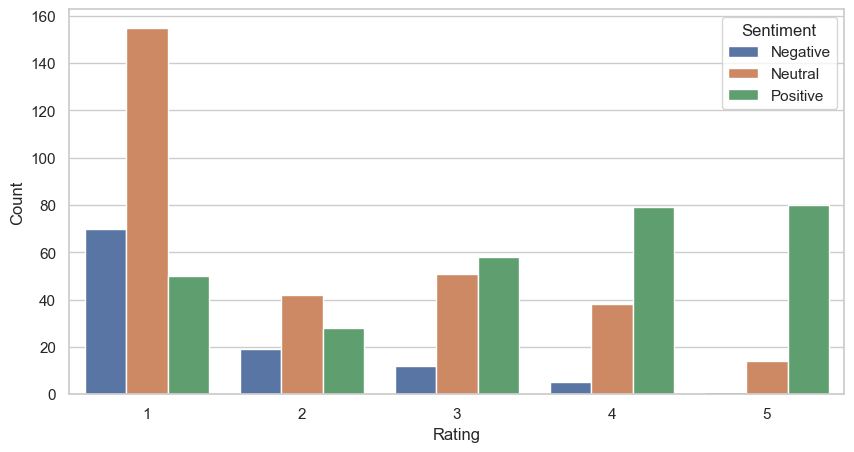

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Rating',hue='Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

## SUMMARY

App Reviews sentiment Analysis is a valuable tool for app developers and bussiness to understand user feedback,priortise feature updates and maintain a positive user community it involve using data analysis techniques to determine whether the sentiments in these reviews are positiove ,negative or nuetral